# Top Neighborhoods for Registry + General Funds Matching

In [1]:
import pandas as pd
import mwdsbe
import schuylkill as skool
import time
import geopandas as gpd

In [127]:
import seaborn as sns
from matplotlib import pyplot as plt

## Data
* registry
* general funds
* matches: matching between registry and general funds
* full_matches: full funds per vendor

In [151]:
registry = mwdsbe.load_registry() # geopandas df
gf = pd.read_excel(r'C:\Users\dabinlee\Documents\GitHub\mwdsbe_binny\MWDSBE\mwdsbe\data\cwedp_37_report.xlsx', sheet_name='general_funds')
# gf = pd.read_excel('/Users/dabinlee/Documents/github/MWDSBE/mwdsbe/data/cwedp_37_report.xlsx', sheet_name='general_funds')

In [152]:
# filter general funds data
gf = gf.loc[gf['MAJ_CLASS'] != 1]
gf = gf.loc[gf['VEND_NAME'].dropna().index]

In [153]:
# clean data
ignore_words = ['inc', 'group', 'llc', 'corp', 'pc', 'incorporated', 'ltd', 'co', 'associates', 'services', 'company', 'enterprises', 'enterprise', 'service', 'corporation']
cleaned_registry = skool.clean_strings(registry, ['company_name', 'dba_name'], True, ignore_words)
cleaned_gf = skool.clean_strings(gf, ['VEND_NAME'], True, ignore_words)

cleaned_registry = cleaned_registry.dropna(subset=['company_name'])
cleaned_gf = cleaned_gf.dropna(subset=['VEND_NAME'])

In [218]:
matches = pd.read_excel(r'C:\Users\dabinlee\Documents\GitHub\mwdsbe_binny\MWDSBE\analysis\data\general_funds\fuzz95_tfidf80.xlsx')
# matches = pd.read_excel('/Users/dabinlee/Documents/github/MWDSBE/analysis/data/general_funds/fuzz95_tfidf913.xlsx')

In [219]:
matches.rename(columns={'Unnamed: 0': 'left_index'}, inplace=True)
matches.set_index('left_index', inplace=True)

In [220]:
# Manually remove 14 wrong matches
wrong_matches = ['a g consulting engineering', 'amercom consulting engineers', 'awk consulting engineers', 
                 'briones consulting engineering', 'dy consulting engineer p c', 'environmental management',
                 'events unlimited', 'hill environmental', 'kma consulting engineers', 'milligan and', 
                 'ms technologies', 'specialists', 'site contractors', 'stell environmental']

In [221]:
matches = matches.loc[matches['company_name'].apply(lambda x : x not in wrong_matches)]

In [222]:
len(matches)

136

In [223]:
unique_vendors = matches['VEND_NAME'].tolist()

In [224]:
full_matches = cleaned_gf.loc[cleaned_gf['VEND_NAME'].apply(lambda x : x in unique_vendors)]

In [225]:
len(full_matches['VEND_NAME'].unique())

135

In [203]:
# why one vendor has not found?
set1 = set(unique_vendors)
set2 = set(full_matches['VEND_NAME'].unique())
diff = set1.difference(set2)

In [204]:
diff

set()

In [205]:
full_matches

,DR_ACCT,CR_ACCT,CURR_PRIOR_FLAG,POSTED_DATE,DEPT,SEC_FD,INDEX,PROGRAM_CD,MAJ_CLASS,CLASS,DOC_NUM,TRANS_DESC,DOC_REF_NUM,VEND_NAME,VEND_NUM,AMT,DOC_NUM4,DOC_REF4
76494,433,201,PRIOR,2018-07-05,1,10,10058,NaN,2,0258,VCXX1900008101,*JUN34828S* CRT RPRTING SVS-6/18,POXX1812349101,strehlow,233036541 01,11125.54,VCXX,POXX
76510,433,201,PRIOR,2018-07-19,1,10,10058,NaN,2,0258,VCXX1900408101,*JUL35226S* CRT RPRTING SVS-6/18,POXX1812349101,strehlow,233036541 01,3273.93,VCXX,POXX
76511,433,201,PRIOR,2018-07-19,1,10,10058,NaN,2,0258,VCXX1900383201,*MAY34385S* CRT RPRTING SVS-4/18&...,POXX1812349101,strehlow,233036541 01,18024.30,VCXX,POXX
76694,431,201,CURR,2018-08-10,1,10,10058,NaN,2,0258,VCXX1901049401,*JUL35228S* CRT RRT WAIT TIME-6/18,POXX1910295101,strehlow,233036541 01,70.00,VCXX,POXX
76695,431,201,CURR,2018-08-13,1,10,10058,NaN,2,0258,VCXX1901062201,*JUL35391S* CRT RPRTING SVS-7/18,POXX1910293901,strehlow,233036541 01,587.10,VCXX,POXX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317129,433,201,PRIOR,2018-07-27,23,10,230073,NaN,4,0427,VCXX1900606001,*B08480763* B08480763/EQUIP/06/18,POXX1812162501,shi international,223009648 01,21700.00,VCXX,POXX
317142,431,201,CURR,2019-06-27,22,10,226280,NaN,4,0427,VCXX1909362302,#B10002045# SCANNER,POXX1912118102,shi international,223009648 01,168.80,VCXX,POXX
317146,431,201,CURR,2019-06-18,22,10,226280,NaN,4,0427,VCXX1909085702,#B10068691# WEBCAM,POXX1912141802,shi international,223009648 01,166.00,VCXX,POXX
317156,433,201,PRIOR,2019-01-08,22,10,226280,NaN,4,0427,VCXX1903988102,#B08440820# ENDRUN,POXX1812335002,shi international,223009648 01,1785.53,VCXX,POXX


In [240]:
data = matches.merge(full_matches, how='right', on='VEND_NAME')

In [242]:
# do not use columns with _x
data

,company_name,dba_name,owner_first,owner_last,location,location_city,location_state,zip_code,mailing_address,mailing_city,...,PROGRAM_CD_y,MAJ_CLASS_y,CLASS_y,DOC_NUM_y,TRANS_DESC_y,DOC_REF_NUM_y,VEND_NUM_y,AMT_y,DOC_NUM4_y,DOC_REF4_y
0,4u,stellar,Liang,Chen,"70 West 36th Street, Ste. #702",New York,NY,10018,"70 West 36th Street, Ste. #702",New York,...,NaN,2,0250,PVMD1902159601,*1669* MAY19 DAO,MDXX1900001301,113189413 02,7420.00,PVMD,MDXX
1,4u,stellar,Liang,Chen,"70 West 36th Street, Ste. #702",New York,NY,10018,"70 West 36th Street, Ste. #702",New York,...,NaN,2,0250,PVMD1901949904,*BILL002235* DEC18,MDXX1900001301,113189413 02,7700.00,PVMD,MDXX
2,4u,stellar,Liang,Chen,"70 West 36th Street, Ste. #702",New York,NY,10018,"70 West 36th Street, Ste. #702",New York,...,NaN,2,0250,PVMD1901949903,*BILL002070* OCT18,MDXX1900001301,113189413 02,4900.00,PVMD,MDXX
3,4u,stellar,Liang,Chen,"70 West 36th Street, Ste. #702",New York,NY,10018,"70 West 36th Street, Ste. #702",New York,...,NaN,2,0250,PVMD1901949902,*BILL001983* SEP18,MDXX1900001301,113189413 02,2660.00,PVMD,MDXX
4,4u,stellar,Liang,Chen,"70 West 36th Street, Ste. #702",New York,NY,10018,"70 West 36th Street, Ste. #702",New York,...,NaN,2,0250,PVMD1901949901,*BILL001736* JUN18,MDXX1900001301,113189413 02,11250.00,PVMD,MDXX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5661,zanaras reporting video,NaN,JULIE,ZANARAS,"1845 WALNUT STREET, Suite 938",Philadelphia,PA,19103,"1845 WALNUT STREET, Suite 938",Philadelphia,...,NaN,2,0258,PVXX1900215301,*55196* AUG18 REED V. SEPTA 16-2851-001,NaN,510620006 01,365.40,PVXX,NaN
5662,zanaras reporting video,NaN,JULIE,ZANARAS,"1845 WALNUT STREET, Suite 938",Philadelphia,PA,19103,"1845 WALNUT STREET, Suite 938",Philadelphia,...,NaN,2,0258,PVXX1900096101,*53849* MAR18 98523 STREETS CALZADO V. SEPTA,NaN,510620006 01,225.60,PVXX,NaN
5663,zanaras reporting video,NaN,JULIE,ZANARAS,"1845 WALNUT STREET, Suite 938",Philadelphia,PA,19103,"1845 WALNUT STREET, Suite 938",Philadelphia,...,NaN,2,0258,PVXX1900071801,*54850* JUL18 98724 STREETS ANDREWS V. SEPTA,NaN,510620006 01,248.75,PVXX,NaN
5664,zanaras reporting video,NaN,JULIE,ZANARAS,"1845 WALNUT STREET, Suite 938",Philadelphia,PA,19103,"1845 WALNUT STREET, Suite 938",Philadelphia,...,NaN,2,0258,PVXX1900018601,*54513* MAY18 99242 STREETS JOHNSON V. CITY,NaN,510620006 01,481.95,PVXX,NaN


data has invalid geometry. Drop the existing geometry column and recreate it using lng and lat

In [261]:
data_geo = data.dropna(subset=['geometry'])

In [262]:
len(data_geo)

2720

In [263]:
# drop existing geometry and create a new one
data_geo.drop('geometry', axis=1, inplace=True)

C:\Users\dabinlee\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [264]:
data_geo['geometry'] = list(zip(data_geo['lng'], data_geo['lat']))

C:\Users\dabinlee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [265]:
from shapely.geometry import Point
data_geo['geometry'] = data_geo['geometry'].apply(Point)

C:\Users\dabinlee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [266]:
data_gdf = gpd.GeoDataFrame(data_geo, geometry='geometry', crs={"init": "epsg:4326"})

In [267]:
len(data_gdf)

2720

In [268]:
zillow = gpd.read_file('data/neighborhood/zillow_neighborhoods.geojson')
# zillow = zillow.to_crs(epsg=3857)

In [269]:
joined = gpd.sjoin(data_gdf, zillow, op='within', how='left')

In [270]:
len(joined)

2720

In [271]:
# joined with unique companies for exact number of vendors by neighborhoods
unique_joined = joined.drop_duplicates(subset=['VEND_NAME'])

In [272]:
len(unique_joined)

55

In [273]:
joined.columns

Index(['company_name', 'dba_name', 'owner_first', 'owner_last', 'location',
       'location_city', 'location_state', 'zip_code', 'mailing_address',
       'mailing_city', 'mailing_state', 'mailing_zip', 'certification_type',
       'capability', 'local', 'out_of_state', 'location_standard', 'lat',
       'lng', 'match_probability', 'right_index', 'DR_ACCT_x', 'CR_ACCT_x',
       'CURR_PRIOR_FLAG_x', 'POSTED_DATE_x', 'DEPT_x', 'SEC_FD_x', 'INDEX_x',
       'PROGRAM_CD_x', 'MAJ_CLASS_x', 'CLASS_x', 'DOC_NUM_x', 'TRANS_DESC_x',
       'DOC_REF_NUM_x', 'VEND_NAME', 'VEND_NUM_x', 'AMT_x', 'DOC_NUM4_x',
       'DOC_REF4_x', 'DR_ACCT_y', 'CR_ACCT_y', 'CURR_PRIOR_FLAG_y',
       'POSTED_DATE_y', 'DEPT_y', 'SEC_FD_y', 'INDEX_y', 'PROGRAM_CD_y',
       'MAJ_CLASS_y', 'CLASS_y', 'DOC_NUM_y', 'TRANS_DESC_y', 'DOC_REF_NUM_y',
       'VEND_NUM_y', 'AMT_y', 'DOC_NUM4_y', 'DOC_REF4_y', 'department_title_x',
       'N_x', 'department_title_y', 'N_y', 'geometry', 'index_right',
       'ZillowName'],
  

In [274]:
total_amt = joined.groupby('ZillowName')['AMT_y'].sum()
total_amt = total_amt.to_frame('total_amt').reset_index()
total_amt.head()

,ZillowName,total_amt
0,Allegheny West,2416064.47
1,Callow Hill,76522.41
2,Cedarbrook,19318.10
3,Chestnut Hill,1300.00
4,East Passyunk,1230.00


In [275]:
total_n = unique_joined.groupby('ZillowName').size()
total_n = total_n.to_frame('total_n').reset_index()
total_n.head()

,ZillowName,total_n
0,Allegheny West,1
1,Callow Hill,1
2,Cedarbrook,1
3,Chestnut Hill,1
4,East Passyunk,1


In [276]:
joined.certification_type.unique()

array(['WBE', 'MBE', 'MWBE'], dtype=object)

In [277]:
total_cert = joined.groupby(['ZillowName', 'certification_type'])['AMT_y'].sum()
total_cert = total_cert.to_frame('amt_cert_type').reset_index()
total_cert.head()

,ZillowName,certification_type,amt_cert_type
0,Allegheny West,MBE,2416064.47
1,Callow Hill,MBE,76522.41
2,Cedarbrook,MBE,19318.10
3,Chestnut Hill,MWBE,1300.00
4,East Passyunk,MBE,1230.00


In [278]:
total_mbe_amt = total_cert.loc[total_cert['certification_type'] == 'MBE']
total_mbe_amt.drop('certification_type', axis=1, inplace=True)
total_mbe_amt.rename(columns={'amt_cert_type': 'mbe_amt'}, inplace=True)

C:\Users\dabinlee\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\dabinlee\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [279]:
total_mbe_amt.head()

,ZillowName,mbe_amt
0,Allegheny West,2416064.47
1,Callow Hill,76522.41
2,Cedarbrook,19318.10
4,East Passyunk,1230.00
8,Holmesburg,1081458.06


In [280]:
total_wbe_amt = total_cert.loc[total_cert['certification_type'] == 'WBE']
total_wbe_amt.drop('certification_type', axis=1, inplace=True)
total_wbe_amt.rename(columns={'amt_cert_type': 'wbe_amt'}, inplace=True)

In [281]:
total_wbe_amt.head()

,ZillowName,wbe_amt
5,Fishtown,31528.00
7,Germantown West Central,1178.64
9,Holmesburg,150524.04
12,Logan Square,24772.57
16,Northeast Airport,28174.74


In [282]:
total_mwbe_amt = total_cert.loc[total_cert['certification_type'] == 'MWBE']
total_mwbe_amt.drop('certification_type', axis=1, inplace=True)
total_mwbe_amt.rename(columns={'amt_cert_type': 'mwbe_amt'}, inplace=True)

In [283]:
total_mwbe_amt.head()

,ZillowName,mwbe_amt
3,Chestnut Hill,1300.00
6,Germantown Southwest,895.83
10,Lawndale,1271.00
13,Mount Airy East,106607.00
14,Mount Airy West,104062.50


In [284]:
total_cert_n = unique_joined.groupby(['ZillowName', 'certification_type']).size()
total_cert_n = total_cert_n.to_frame('n_cert_type').reset_index()
total_cert_n.head()

,ZillowName,certification_type,n_cert_type
0,Allegheny West,MBE,1
1,Callow Hill,MBE,1
2,Cedarbrook,MBE,1
3,Chestnut Hill,MWBE,1
4,East Passyunk,MBE,1


In [285]:
total_mbe_n = total_cert_n.loc[total_cert_n['certification_type'] == 'MBE']
total_mbe_n.drop('certification_type', axis=1, inplace=True)
total_mbe_n.rename(columns={'n_cert_type': 'mbe_n'}, inplace=True)

In [286]:
total_mbe_n.head()

,ZillowName,mbe_n
0,Allegheny West,1
1,Callow Hill,1
2,Cedarbrook,1
4,East Passyunk,1
8,Holmesburg,1


In [287]:
total_wbe_n = total_cert_n.loc[total_cert_n['certification_type'] == 'WBE']
total_wbe_n.drop('certification_type', axis=1, inplace=True)
total_wbe_n.rename(columns={'n_cert_type': 'wbe_n'}, inplace=True)

In [288]:
total_wbe_n.head()

,ZillowName,wbe_n
5,Fishtown,1
7,Germantown West Central,1
9,Holmesburg,3
12,Logan Square,1
16,Northeast Airport,1


In [289]:
total_mwbe_n = total_cert_n.loc[total_cert_n['certification_type'] == 'MWBE']
total_mwbe_n.drop('certification_type', axis=1, inplace=True)
total_mwbe_n.rename(columns={'n_cert_type': 'mwbe_n'}, inplace=True)

In [290]:
total_mwbe_n.head()

,ZillowName,mwbe_n
3,Chestnut Hill,1
6,Germantown Southwest,1
10,Lawndale,1
13,Mount Airy East,1
14,Mount Airy West,1


In [291]:
totals = zillow.merge(total_amt, on='ZillowName', how='left')
totals = totals.merge(total_mbe_amt, on='ZillowName', how='left')
totals = totals.merge(total_wbe_amt, on='ZillowName', how='left')
totals = totals.merge(total_mwbe_amt, on='ZillowName', how='left')
totals = totals.merge(total_n, on='ZillowName', how='left')
totals = totals.merge(total_mbe_n, on='ZillowName', how='left')
totals = totals.merge(total_wbe_n, on='ZillowName', how='left')
totals = totals.merge(total_mwbe_n, on='ZillowName', how='left')

In [292]:
totals['total_amt'] = totals['total_amt'].fillna(0)
totals['mbe_amt'] = totals['mbe_amt'].fillna(0)
totals['wbe_amt'] = totals['wbe_amt'].fillna(0)
totals['mwbe_amt'] = totals['mwbe_amt'].fillna(0)
totals['total_n'] = totals['total_n'].fillna(0)
totals['mbe_n'] = totals['mbe_n'].fillna(0)
totals['wbe_n'] = totals['wbe_n'].fillna(0)
totals['mwbe_n'] = totals['mwbe_n'].fillna(0)

In [293]:
totals

,ZillowName,geometry,total_amt,mbe_amt,wbe_amt,mwbe_amt,total_n,mbe_n,wbe_n,mwbe_n
0,Academy Gardens,"POLYGON ((-74.99851 40.06435, -74.99456 40.061...",0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,Airport,"POLYGON ((-75.19728 39.89252, -75.19617 39.892...",0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,Allegheny West,"POLYGON ((-75.16592 40.00327, -75.16596 40.003...",2416064.47,2416064.47,0.0,0.0,1.0,1.0,0.0,0.0
3,Andorra,"POLYGON ((-75.22463 40.06686, -75.22588 40.065...",0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,Aston Woodbridge,"POLYGON ((-75.00860 40.05369, -75.00861 40.053...",0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
153,Wister,"POLYGON ((-75.17210 40.03840, -75.17197 40.037...",0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
154,Woodland Terrace,"POLYGON ((-75.20399 39.94968, -75.20396 39.949...",35655.11,35655.11,0.0,0.0,1.0,1.0,0.0,0.0
155,Wynnefield,"POLYGON ((-75.22070 40.00392, -75.21792 39.994...",0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
156,Wynnefield Heights,"POLYGON ((-75.20103 40.00419, -75.20410 40.000...",0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [294]:
totals.to_file(r'C:\Users\dabinlee\Documents\GitHub\mwdsbe_binny\MWDSBE\analysis\data\general_funds\totals_nhoods_136.geojson', driver='GeoJSON')
# totals.to_file('/Users/dabinlee/Documents/github/MWDSBE/analysis/data/general_funds/totals_nhoods_136.geojson', driver='GeoJSON')

## Analysis

### Top 10 Vendors by dollar amount

In [243]:
data.columns

Index(['company_name', 'dba_name', 'owner_first', 'owner_last', 'location',
       'location_city', 'location_state', 'zip_code', 'mailing_address',
       'mailing_city', 'mailing_state', 'mailing_zip', 'certification_type',
       'capability', 'local', 'out_of_state', 'location_standard', 'lat',
       'lng', 'geometry', 'match_probability', 'right_index', 'DR_ACCT_x',
       'CR_ACCT_x', 'CURR_PRIOR_FLAG_x', 'POSTED_DATE_x', 'DEPT_x', 'SEC_FD_x',
       'INDEX_x', 'PROGRAM_CD_x', 'MAJ_CLASS_x', 'CLASS_x', 'DOC_NUM_x',
       'TRANS_DESC_x', 'DOC_REF_NUM_x', 'VEND_NAME', 'VEND_NUM_x', 'AMT_x',
       'DOC_NUM4_x', 'DOC_REF4_x', 'DR_ACCT_y', 'CR_ACCT_y',
       'CURR_PRIOR_FLAG_y', 'POSTED_DATE_y', 'DEPT_y', 'SEC_FD_y', 'INDEX_y',
       'PROGRAM_CD_y', 'MAJ_CLASS_y', 'CLASS_y', 'DOC_NUM_y', 'TRANS_DESC_y',
       'DOC_REF_NUM_y', 'VEND_NUM_y', 'AMT_y', 'DOC_NUM4_y', 'DOC_REF4_y'],
      dtype='object')

In [244]:
vendors_amt = data.groupby('VEND_NAME')['AMT_y'].sum().to_frame('AMT').reset_index()

In [245]:
top10_vendors_amt = vendors_amt.sort_values(by='AMT', ascending=False)[:10]

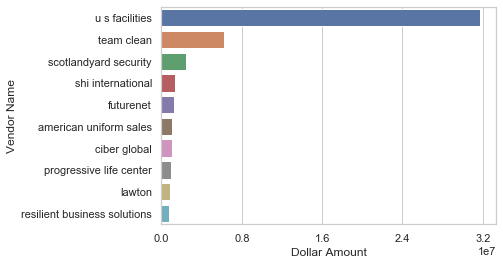

In [246]:
sns.set(style="whitegrid")
ax = sns.barplot(x="AMT", y="VEND_NAME", data=top10_vendors_amt)
ax.set(xlabel='Dollar Amount', ylabel='Vendor Name')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.show()

### Top 10 Departments by dollar amount

In [251]:
# get dept title from city payments data
city_payments = pd.read_excel(r'C:\Users\dabinlee\Documents\GitHub\mwdsbe_binny\MWDSBE\analysis\data\payments\city_payments_detailed_2017.xlsx')

In [252]:
simple_cp = city_payments[['dept', 'department_title']]

In [253]:
simple_cp = simple_cp.groupby(['dept', 'department_title']).size().to_frame('N').reset_index()

In [254]:
data = data.merge(simple_cp, how='left', left_on='DEPT_y', right_on='dept').drop(['dept'], axis=1)

In [257]:
dept_amt = data.groupby('department_title_y')['AMT_y'].sum().to_frame('AMT').reset_index()

In [258]:
top10_dept_amt = dept_amt.sort_values(by='AMT', ascending=False)[:10]

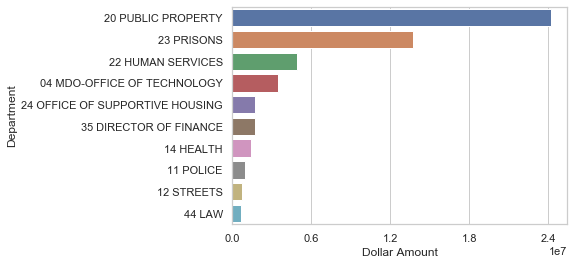

In [260]:
sns.set(style="whitegrid")
ax = sns.barplot(x="AMT", y="department_title_y", data=top10_dept_amt)
ax.set(xlabel='Dollar Amount', ylabel='Department')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.show()